# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* **credit.policy**: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* **purpose**: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* **int.rate**: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* **installment**: The monthly installments owed by the borrower if the loan is funded.
* **log.annual.inc**: The natural log of the self-reported annual income of the borrower.
* **dti**: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* **fico**: The FICO credit score of the borrower.
* **days.with.cr.line**: The number of days the borrower has had a credit line.
* **revol.bal**: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* **revol.util**: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* **inq.last.6mths**: The borrower's number of inquiries by creditors in the last 6 months.
* **delinq.2yrs**: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* **pub.rec**: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('whitegrid')

## Get the Data

**Use pandas to read loan_data.csv as a dataframe called loans.**

In [3]:
loans = pd.read_csv('loan_data.csv')

**Check out the info(), head(), and describe() methods on loans.**

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
credit.policy,9578,NaN,NaN,NaN,0.80497,0.396245,0,1,1,1,1
purpose,9578,7,debt_consolidation,3957,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int.rate,9578,NaN,NaN,NaN,0.12264,0.026847,0.06,0.1039,0.1221,0.1407,0.2164
installment,9578,NaN,NaN,NaN,319.089,207.071,15.67,163.77,268.95,432.762,940.14
log.annual.inc,9578,NaN,NaN,NaN,10.9321,0.614813,7.5475,10.5584,10.9289,11.2913,14.5284
dti,9578,NaN,NaN,NaN,12.6067,6.88397,0,7.2125,12.665,17.95,29.96
fico,9578,NaN,NaN,NaN,710.846,37.9705,612,682,707,737,827
days.with.cr.line,9578,NaN,NaN,NaN,4560.77,2496.93,178.958,2820,4139.96,5730,17640
revol.bal,9578,NaN,NaN,NaN,16914,33756.2,0,3187,8596,18249.5,1.20736e+06
revol.util,9578,NaN,NaN,NaN,46.7992,29.0144,0,22.6,46.3,70.9,119


In [6]:
loans.sample(6)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
2691,1,debt_consolidation,0.0800,172.35,10.373616,19.20,757,3749.958333,6860,29.4,0,0,0,0
1350,1,major_purchase,0.1272,59.57,10.714418,10.64,667,3179.958333,1030,4.6,0,3,0,0
3542,1,debt_consolidation,0.1126,492.95,10.645425,12.06,742,6059.958333,24651,42.4,1,0,0,0
1117,1,credit_card,0.0863,189.77,10.503697,18.77,757,2369.958333,0,0.0,1,0,0,0
2285,1,educational,0.1600,225.01,10.308953,5.76,667,1290.041667,395,1.7,2,1,0,0
1958,1,all_other,0.0932,134.18,10.515832,8.52,737,4590.041667,13385,57.5,1,0,0,0


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

Text(0.5,0,'FICO')

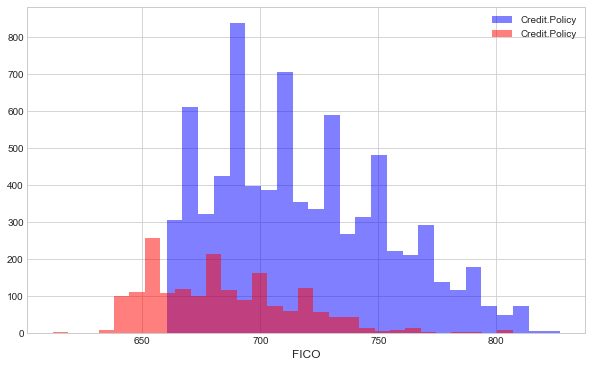

In [7]:
plt.figure(figsize=(10, 6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=.5, color='blue',
                                             bins=30, label='Credit.Policy')
loans[loans['credit.policy']==0]['fico'].hist(alpha=.5, color='red',
                                             bins=30, label='Credit.Policy')
plt.legend()
plt.xlabel('FICO')

**Create a similar figure, except this time select by the not.fully.paid column.**

Text(0.5,0,'FICO')

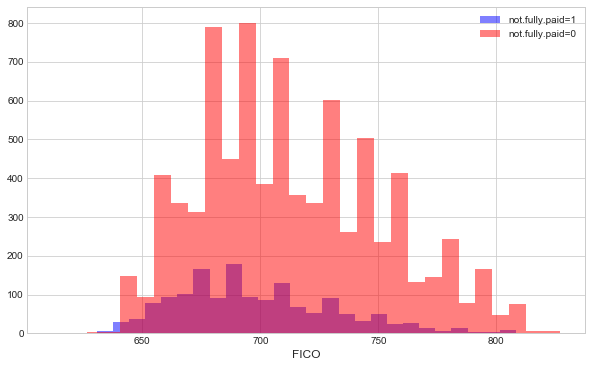

In [8]:
plt.figure(figsize=(10, 6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=.5, color='blue',
                                              bins=30, label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=.5, color='red',
                                              bins=30, label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

**Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.**

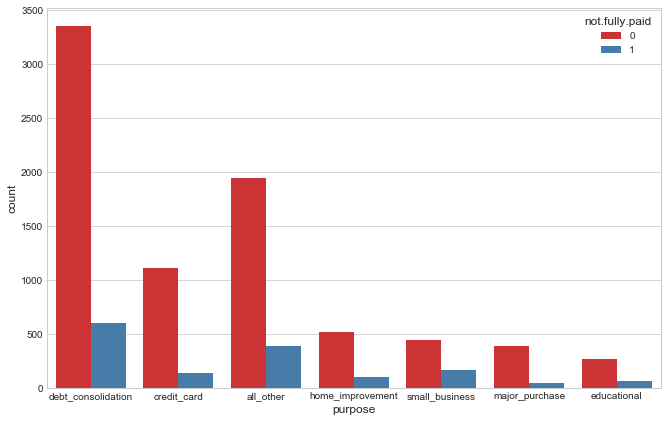

In [10]:
plt.figure(figsize=(11, 7))
sns.countplot(x='purpose', hue='not.fully.paid', data=loans, palette='Set1')

**Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

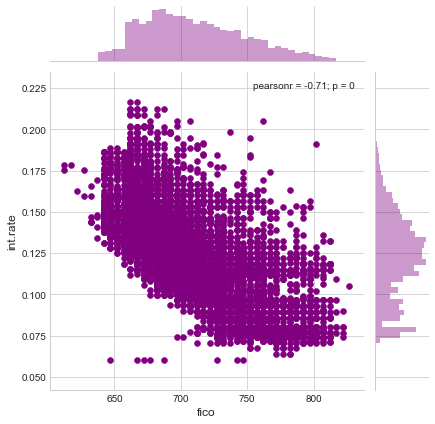

In [14]:
sns.jointplot(x='fico', y='int.rate', data=loans, color='purple')

**Create the following lmplots to see if the trend differet between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

<Figure size 792x504 with 0 Axes>

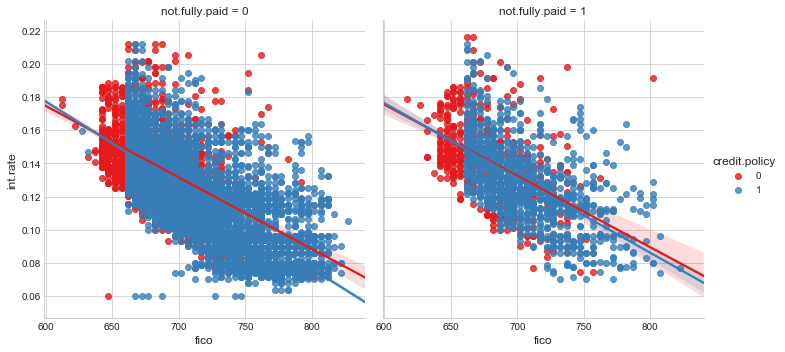

In [15]:
plt.figure(figsize=(11, 7))
sns.lmplot(y='int.rate', x='fico', data=loans, hue='credit.policy',
          col='not.fully.paid', palette='Set1')

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [16]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

### Get Dummy Variable

In [17]:
cat_feats = ['purpose']

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [18]:
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)

In [19]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

## Train Test Split

Now its time to split our data into a training set and a testing set!

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

**Import DecisionTreeClassifier**

In [22]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [23]:
dtree = DecisionTreeClassifier()

In [24]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [25]:
y_pred = dtree.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.85      0.84      0.84      2650
          1       0.20      0.21      0.21       511

avg / total       0.74      0.74      0.74      3161



In [29]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2231,419,2650
1,404,107,511
All,2635,526,3161


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier(n_estimators=700)

In [37]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

**Predict the class of not.fully.paid for the X_test data.**

In [38]:
y_pred = rfc.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [39]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91      2650
          1       0.42      0.02      0.03       511

avg / total       0.77      0.84      0.77      3161



**Show the Confusion Matrix for the predictions.**

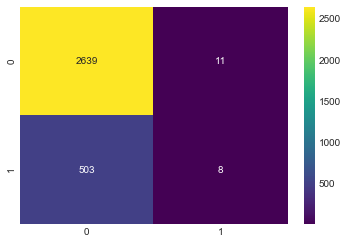

In [41]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='viridis', fmt='g', annot=True)

**What performed better the random forest or the decision tree?**

- It depneds on what metric we are trying to optimize for.
- You can notice here, the `Recall` for each class for the models.
- Neither did very well, more feature engineering is needed.

# Great Job!